In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
from pathlib import Path

import json
import pyam
import scmdata
import pandas as pd
import numpy as np
from pymagicc.io import MAGICCData

import utils

## plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
data_all = pd.read_csv(
    str(Path(utils.DATA_DIR / "plotting_data" / "figure5" / f"{ID}.csv"))
)

<IPython.core.display.Javascript object>

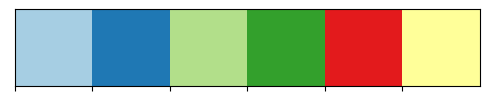

<IPython.core.display.Javascript object>

In [5]:
colors = [
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[1],
    #  sns.color_palette("Paired")[11],
    sns.color_palette("Paired")[2],
    sns.color_palette("Paired")[3],
    sns.color_palette("Paired")[5],
    sns.color_palette("Paired")[10],
]
sns.palplot(colors)

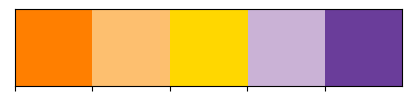

<IPython.core.display.Javascript object>

In [6]:
colors_TCRE = [
    # "saddlebrown",
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[6],
    "gold",
    sns.color_palette("Paired")[8],
    sns.color_palette("Paired")[9],
    #   "brown",
]
sns.palplot(colors_TCRE)

In [7]:
data_all["eTCRE-ratio"] = pd.cut(
    data_all["TCRE_ratio_up"],
    [-300, 0, 1, 2, 4, 30],
    labels=["< 0", "0 - 1", "1 - 2", "2 - 4", "> 4"],
    # labels=["<0.01", "0.01-0.02", "0.02-0.05", "0.05-0.2", "0.2-0.3", ">0.3"],
)

data_all["Max deployed annual NNEs"] = pd.cut(
    data_all["max_deployed_CDR"],
    [-20, 1, 5, 15, 25, 45],
    labels=["< 1", "1 - 5", "5 - 15", "15 - 25", "> 25"],
)


<IPython.core.display.Javascript object>

In [8]:
current_pol = data_all[
    (data_all["2100_warming"] >= 2.35) & (data_all["2100_warming"] <= 2.45)
]

<IPython.core.display.Javascript object>

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_6667/2178665909.py:20: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(


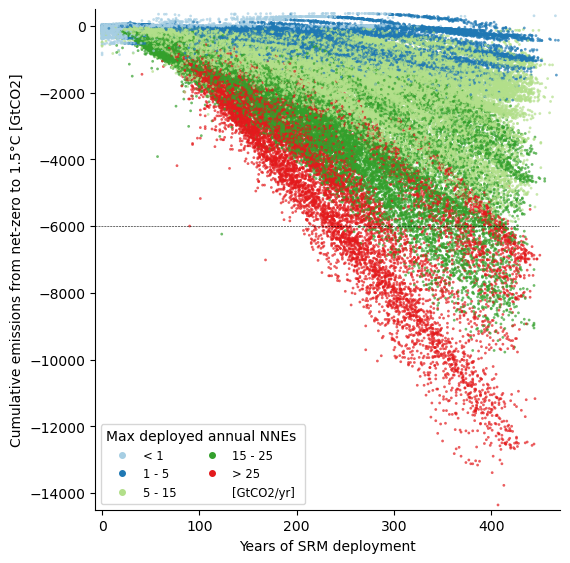

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(figsize=(6, 6.5))


x = "cumulative_emms_net0_to_15"
y = "SRM_at_first_crossing"
hue = "Max deployed annual NNEs"

plt.ylabel("Cumulative emissions from net-zero to 1.5°C [GtCO2]")
plt.xlabel("Years of SRM deployment")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.ylim(-14500, 500)
plt.xlim(-7, 471)

ax.hlines(-6000, -7, 470, color="black", ls="--", lw=0.4)


sns.scatterplot(
    data=data_all,
    x=y,
    y=x,
    hue=hue,
    palette=colors,
    alpha=0.7,
    s=4,
    ec=None,
    legend=True,
)

import matplotlib.lines as mlines

smaller1 = mlines.Line2D(
    [], [], color=colors[0], marker="o", linestyle="None", markersize=4, label="< 1"
)
CDR15 = mlines.Line2D(
    [], [], color=colors[1], marker="o", linestyle="None", markersize=4, label="1 - 5"
)
CDR515 = mlines.Line2D(
    [], [], color=colors[2], marker="o", linestyle="None", markersize=4, label="5 - 15"
)
CDR1525 = mlines.Line2D(
    [], [], color=colors[3], marker="o", linestyle="None", markersize=4, label="15 - 25"
)
larger25 = mlines.Line2D(
    [], [], color=colors[4], marker="o", linestyle="None", markersize=4, label="> 25"
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2/yr]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Max deployed annual NNEs ",
    fontsize="small",
    #   bbox_to_anchor=(0.35, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)


plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure5" / f"{ID}_5a.png")), bbox_inches="tight"
)
plt.show()

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_6667/2987721315.py:20: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(


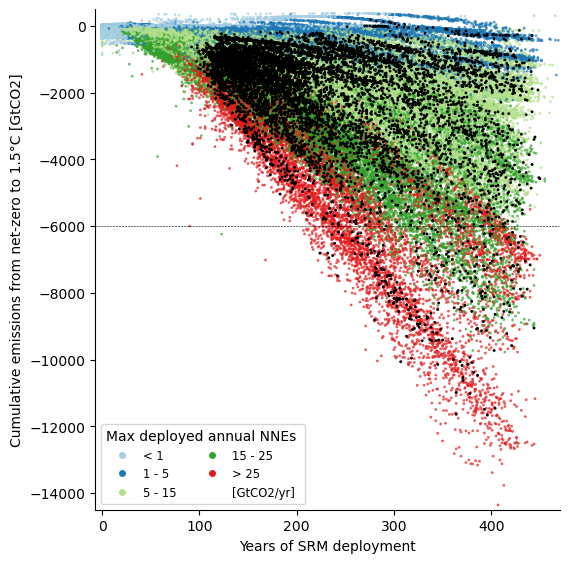

<IPython.core.display.Javascript object>

In [12]:
fig, ax = plt.subplots(figsize=(6, 6.5))


x = "cumulative_emms_net0_to_15"
y = "SRM_at_first_crossing"
hue = "Max deployed annual NNEs"

plt.ylabel("Cumulative emissions from net-zero to 1.5°C [GtCO2]")
plt.xlabel("Years of SRM deployment")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.ylim(-14500, 500)
plt.xlim(-7, 471)

ax.hlines(-6000, -7, 470, color="black", ls="--", lw=0.4)


sns.scatterplot(
    data=data_all,
    x=y,
    y=x,
    hue=hue,
    palette=colors,
    alpha=0.7,
    s=4,
    ec=None,
    legend=True,
)
sns.scatterplot(data=current_pol, x=y, y=x, color="black", s=4, ec=None)

import matplotlib.lines as mlines

smaller1 = mlines.Line2D(
    [], [], color=colors[0], marker="o", linestyle="None", markersize=4, label="< 1"
)
CDR15 = mlines.Line2D(
    [], [], color=colors[1], marker="o", linestyle="None", markersize=4, label="1 - 5"
)
CDR515 = mlines.Line2D(
    [], [], color=colors[2], marker="o", linestyle="None", markersize=4, label="5 - 15"
)
CDR1525 = mlines.Line2D(
    [], [], color=colors[3], marker="o", linestyle="None", markersize=4, label="15 - 25"
)
larger25 = mlines.Line2D(
    [], [], color=colors[4], marker="o", linestyle="None", markersize=4, label="> 25"
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2/yr]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Max deployed annual NNEs ",
    fontsize="small",
    #   bbox_to_anchor=(0.35, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)


plt.savefig(str(Path(utils.PLOTS_DIR / "SI" / f"{ID}_S04.png")), bbox_inches="tight")
plt.show()

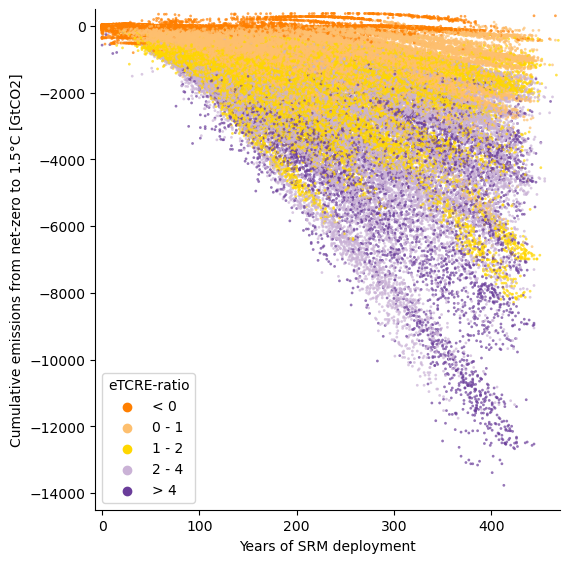

<IPython.core.display.Javascript object>

In [11]:
fig, ax = plt.subplots(figsize=(6, 6.5))


x = "cumulative_emms_net0_to_15"
y = "SRM_at_first_crossing"
hue = "eTCRE-ratio"

plt.ylabel("Cumulative emissions from net-zero to 1.5°C [GtCO2]")
plt.xlabel("Years of SRM deployment")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.ylim(-14500, 500)
plt.xlim(-7, 471)

# sns.scatterplot(data=data_all, x=y, y=x, hue=hue, palette=sns.dark_palette("#69d", reverse=True), alpha=0.7, s=4)
sns.scatterplot(
    data=data_all,
    x=y,
    y=x,
    hue=hue,
    palette=colors_TCRE,
    alpha=0.7,
    s=4,
    ec=None,
)

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure5" / f"{ID}_5b.png")), bbox_inches="tight"
)
plt.show()